# Anàlisi de les dades
## Nota sobre les limitacions de l'anàlisi 
Les dades obtingudes poden contenir errors deguts a:
- Errors en la recollida de dades a causa d'erros humans
- Errors en la classificació de les dades a causa d'errors informàtics

No es realitzarà una comprovació de les dades a causa de la magnitud de l'estudi i l'objectiu de l'anàlisi.
Tanmateix, en les conclusións de cada anàlisi es tindran en compte aquestes limitacions.

## Objectiu de l'anàlisi
TODO: Afegir objectiu de l'anàlisi

## Importació de llibreries i funcions pròpies

In [1]:
import pandas as pd
from auxiliary_functions import test_indepe_plot, test_indepe_bin_plot, comptatge_i_percentatge_cat, mitjana_i_std_num
from listas import num_var, cat_var, num_tests, cat_tests

## Càrrega de les dades
Les dades s'han tractat prèviament amb l'script 'process_database.py' i s'han guardat en un dataframe de Pandas. Aquestes dades contenen la informació de tots els pacients de l'estudi.

In [2]:
taula = pd.read_pickle('./data/processed/dataframe.pkl')

## Segmentació de les dades
Es distribuiran les dades en 3 grups (més un grup que conté la totalitat de dades):
- **AMB_PA**: aquest grup està compost per pacients que contenen el codi ICD de pneumònia aspirativa al seu historial.
- **AMB_PA_MECVV**: aquest grup conté els pacients que compleixen les següents característiques: 
    - Han donat positiu al MECV-V (és a dir, que tenen disfàgia i una alteració en la seguretat o en l'eficàcia)
    - Han sigut diagnosticats amb el codi ICD de pneumònia
    - Han passat menys de 30 dies entre el diagnòstic amb l'ICD de pneumònia i el resultat positiu al MECV-V
- **SENSE_PA**: aquest grup està format per pacients que contenen el codi ICD de pneumònia o bé compleixen que:
    - Contenen el codi ICD de pneumònia
    - Han donat positiu al MECV-V 
    - Han passat més de 30 dies entre el diagnòstic amb l'ICD de pneumònia i el resultat positiu del MECV-V 
- **TOTAL**: aquest grup conté tots els pacients de l'estudi

### AMB_PA 

In [3]:
AMB_PA = taula[taula["PA diagnosticada"] == 1.0]
AMB_PA.head()

,edat,sexe M,visitaDietista,labs,mna,emina,canadenca,pes,atcs,mecvvs,...,Pèrdua pes entre ingressos,Pèrdua pes total,Data més antiga pneumònia,Dies entre primer ICD pneumònia i primer MECV-V positiu,Barthel categòric,MNA categòric,EMINA categòric,Canadenca categòrica,Pèrdua pes entre ingressos categòrica,Classificació pacient
0,89,0,0,[],[],"[{'activitat': '2', 'estatMental': '1', 'humit...",[],[],"[{'codi': 'M01AE', 'dataInici': '2020-06-21 00...",[],...,None,None,2020-06-18,NaN,Dependència total,Desconegut,Risc moderat,Desconegut,No disponible,AMB_PA
1,70,1,0,"[{'date': '20220524', 'name': 'PCR SARS-CoV2 S...",[],"[{'activitat': '0', 'estatMental': '0', 'humit...",[],"[{'valor': '64.7', 'data': '2022-10-04'}, {'va...","[{'codi': 'C09AA', 'dataInici': '2021-05-26 00...","[{'data': '20220930', 'pacientNoColabora': '',...",...,None,16.3,2022-09-29,NaN,Dependència severa,Desconegut,Risc baix,Desconegut,No disponible,AMB_PA
3,85,1,0,[],[],"[{'activitat': '2', 'estatMental': '1', 'humit...",[],[],"[{'codi': 'G04CA', 'dataInici': '2020-07-15 00...","[{'data': '20201204131810', 'disfagia': 'S', '...",...,None,None,2020-12-02,2.0,Dependència severa,Desconegut,Risc moderat,Desconegut,No disponible,AMB_PA
4,93,1,0,"[{'date': '20220208', 'name': 'UREA Sèrum', 'l...","[{'imc': '0', 'anorexia': '1', 'perduaPes': '1...","[{'activitat': '2', 'estatMental': '1', 'humit...",[],"[{'valor': '49.900', 'data': '2022-06-02'}, {'...","[{'codi': 'N02AA', 'dataInici': '2022-02-01 00...","[{'data': '20220330172303', 'disfagiaConeguda'...",...,None,0.0,NaT,NaN,Dependència total,Malnodrit,Risc moderat,Desconegut,No disponible,AMB_PA
6,101,0,0,[],[],"[{'activitat': '3', 'estatMental': '1', 'humit...",[],[],"[{'codi': 'C09AA', 'dataInici': '2021-08-21 00...","[{'data': '20210819124116', 'disfagia': 'S', '...",...,None,None,2021-08-17,2.0,Dependència total,Desconegut,Risc moderat,Desconegut,No disponible,AMB_PA


# AMB_PA_MECVV

In [4]:
AMB_PA_MECVV = taula[
    (taula["Dies entre primer ICD pneumònia i primer MECV-V positiu"] < 30)] 
AMB_PA_MECVV.head()

,edat,sexe M,visitaDietista,labs,mna,emina,canadenca,pes,atcs,mecvvs,...,Pèrdua pes entre ingressos,Pèrdua pes total,Data més antiga pneumònia,Dies entre primer ICD pneumònia i primer MECV-V positiu,Barthel categòric,MNA categòric,EMINA categòric,Canadenca categòrica,Pèrdua pes entre ingressos categòrica,Classificació pacient
3,85,1,0,[],[],"[{'activitat': '2', 'estatMental': '1', 'humit...",[],[],"[{'codi': 'G04CA', 'dataInici': '2020-07-15 00...","[{'data': '20201204131810', 'disfagia': 'S', '...",...,None,None,2020-12-02,2.0,Dependència severa,Desconegut,Risc moderat,Desconegut,No disponible,AMB_PA
6,101,0,0,[],[],"[{'activitat': '3', 'estatMental': '1', 'humit...",[],[],"[{'codi': 'C09AA', 'dataInici': '2021-08-21 00...","[{'data': '20210819124116', 'disfagia': 'S', '...",...,None,None,2021-08-17,2.0,Dependència total,Desconegut,Risc moderat,Desconegut,No disponible,AMB_PA
12,86,1,0,[],[],"[{'activitat': '1', 'estatMental': '1', 'humit...",[],"[{'valor': '46.4', 'data': '2020-09-09'}]","[{'codi': 'G04CA', 'dataInici': '2020-09-04 00...","[{'data': '20200907110400', 'disfagia': 'S', '...",...,0.0,0.0,2020-09-04,3.0,Dependència severa,Desconegut,Risc moderat,Desconegut,0 kg,AMB_PA
27,100,1,0,[],[],"[{'activitat': '3', 'estatMental': '0', 'humit...",[],"[{'valor': '0', 'data': '2021-09-14'}, {'valor...","[{'codi': 'C08CA', 'dataInici': '2020-11-23 00...","[{'data': '20201125131827', 'disfagia': 'S', '...",...,None,41.1,2020-12-02,7.0,Dependència total,Desconegut,Risc moderat,Desconegut,No disponible,AMB_PA_MECVV
37,86,1,0,"[{'date': '20221003', 'name': 'GLUCOSA Sèrum',...","[{'imc': '', 'anorexia': '', 'perduaPes': '', ...","[{'activitat': '2', 'estatMental': '1', 'humit...",[],"[{'valor': '72', 'data': '2022-10-09'}]","[{'codi': 'G04CA', 'dataInici': '2022-09-26 00...","[{'data': '20221012122425', 'disfagia': 'S', '...",...,None,0.0,2022-09-29,1.0,Dependència total,Malnodrit,Risc moderat,Desconegut,No disponible,AMB_PA


# SENSE_PA

In [5]:
SENSE_PA = taula[
           (taula["Dies entre primer ICD pneumònia i primer MECV-V positiu"] > 30) & 
           (taula['P diagnosticada'] == 1.0)]
SENSE_PA.head()

,edat,sexe M,visitaDietista,labs,mna,emina,canadenca,pes,atcs,mecvvs,...,Pèrdua pes entre ingressos,Pèrdua pes total,Data més antiga pneumònia,Dies entre primer ICD pneumònia i primer MECV-V positiu,Barthel categòric,MNA categòric,EMINA categòric,Canadenca categòrica,Pèrdua pes entre ingressos categòrica,Classificació pacient
13,71,0,0,"[{'date': '20220216', 'name': 'CULTIU Esput', ...",[],"[{'activitat': '3', 'estatMental': '0', 'humit...","[{'dataValoracio': '2020-09-06', 'horaValoraci...",[],"[{'codi': 'C10AA', 'dataInici': '2020-09-06 00...","[{'data': '20200906175506', 'disfagia': 'N', '...",...,None,None,2022-02-14,525.0,Dependència severa,Desconegut,Risc moderat,Dèficit neurològic moderat,No disponible,AMB_PA
25,83,0,0,"[{'date': '20220308', 'name': 'UREA Sèrum', 'l...","[{'imc': '', 'anorexia': '', 'perduaPes': '', ...","[{'activitat': '0', 'estatMental': '1', 'humit...",[],"[{'valor': '57', 'data': '2022-11-03'}, {'valo...","[{'codi': 'C10AA', 'dataInici': '2022-09-27 00...","[{'data': '20220929091303', 'disfagia': 'S', '...",...,None,-6.2,2023-04-09,192.0,Dependència moderada,Malnodrit,Risc baix,Desconegut,No disponible,SENSE_PA
28,95,0,0,"[{'date': '20220526', 'name': 'GLUCOSA Sèrum',...",[],"[{'activitat': '3', 'estatMental': '0', 'humit...",[],"[{'valor': '0', 'data': '2022-05-30'}]","[{'codi': 'C10AA', 'dataInici': '2020-11-18 00...","[{'data': '20220529115841', 'disfagia': 'S', '...",...,0.0,0.0,2022-11-07,162.0,Dependència total,Desconegut,Risc moderat,Desconegut,0 kg,AMB_PA
31,89,1,0,"[{'date': '20220318', 'name': 'BILIRUBINA TOTA...","[{'imc': '', 'anorexia': '', 'perduaPes': '', ...","[{'activitat': '2', 'estatMental': '1', 'humit...",[],"[{'valor': '75', 'data': '2022-01-11'}, {'valo...","[{'codi': 'C10AA', 'dataInici': '2021-12-23 00...","[{'data': '20220119101523', 'disfagia': 'N', '...",...,None,8.0,2023-05-05,458.0,Dependència moderada,Malnodrit,Risc moderat,Desconegut,No disponible,AMB_PA
39,87,0,0,"[{'date': '20230619', 'name': 'GLUCOSA Sèrum',...",[],"[{'activitat': '1', 'estatMental': '0', 'humit...",[],[],"[{'codi': 'N02BE', 'dataInici': '2021-01-17 00...","[{'data': '20220111085147', 'disfagia': 'S', '...",...,None,None,2023-06-19,524.0,Dependència severa,Desconegut,Risc baix,Desconegut,No disponible,AMB_PA


# TOTAL

In [6]:
TOTAL = taula
taula.head()

,edat,sexe M,visitaDietista,labs,mna,emina,canadenca,pes,atcs,mecvvs,...,Pèrdua pes entre ingressos,Pèrdua pes total,Data més antiga pneumònia,Dies entre primer ICD pneumònia i primer MECV-V positiu,Barthel categòric,MNA categòric,EMINA categòric,Canadenca categòrica,Pèrdua pes entre ingressos categòrica,Classificació pacient
0,89,0,0,[],[],"[{'activitat': '2', 'estatMental': '1', 'humit...",[],[],"[{'codi': 'M01AE', 'dataInici': '2020-06-21 00...",[],...,None,None,2020-06-18,NaN,Dependència total,Desconegut,Risc moderat,Desconegut,No disponible,AMB_PA
1,70,1,0,"[{'date': '20220524', 'name': 'PCR SARS-CoV2 S...",[],"[{'activitat': '0', 'estatMental': '0', 'humit...",[],"[{'valor': '64.7', 'data': '2022-10-04'}, {'va...","[{'codi': 'C09AA', 'dataInici': '2021-05-26 00...","[{'data': '20220930', 'pacientNoColabora': '',...",...,None,16.3,2022-09-29,NaN,Dependència severa,Desconegut,Risc baix,Desconegut,No disponible,AMB_PA
2,96,1,0,[],[],"[{'activitat': '3', 'estatMental': '0', 'humit...",[],[],"[{'codi': 'G04CA', 'dataInici': '2020-07-09 00...",[],...,None,None,2020-07-08,NaN,Dependència severa,Desconegut,Risc moderat,Desconegut,No disponible,Desconegut
3,85,1,0,[],[],"[{'activitat': '2', 'estatMental': '1', 'humit...",[],[],"[{'codi': 'G04CA', 'dataInici': '2020-07-15 00...","[{'data': '20201204131810', 'disfagia': 'S', '...",...,None,None,2020-12-02,2.0,Dependència severa,Desconegut,Risc moderat,Desconegut,No disponible,AMB_PA
4,93,1,0,"[{'date': '20220208', 'name': 'UREA Sèrum', 'l...","[{'imc': '0', 'anorexia': '1', 'perduaPes': '1...","[{'activitat': '2', 'estatMental': '1', 'humit...",[],"[{'valor': '49.900', 'data': '2022-06-02'}, {'...","[{'codi': 'N02AA', 'dataInici': '2022-02-01 00...","[{'data': '20220330172303', 'disfagiaConeguda'...",...,None,0.0,NaT,NaN,Dependència total,Malnodrit,Risc moderat,Desconegut,No disponible,AMB_PA


Ara que es tenen totes les dades classificades en aquests grups, es realitzarà una descriptiva, retornant les mitjanes, desviacions estàndard, comptatges i percentatges en un format taula. 

També es compararan els diferents grups amb el p-valor mitjançant T-test, test de Mann-Whitney o test Xi-quadrat per mirar la seva distribució, la qual s'espera que sigui similar entre el grup AMB_PA i AMB_PA_MECVV, i diferent entre SENSE_PA i els altres 2 grups. 

Els tests que es van programar per les dues funcions encarregades d’aquesta anàlisi distributiva van ser els següents: 
   - Funció per variables numèriques: fer primer un test de Shapiro-Wilk per comprovar si seguien una distribució normal, si és així, fer que la funció apliqui el T-test, i si no, el de Mann-Whitney. En el cas que les dades tinguessin una mida mostral superior a 5.000, per comprovar si la seguien una distribució normal, en comptes del test de Shapiro-Wilk, s’utilitzaria el de Kolmogorov-Smirnov.
    

   - Funció per variables categòriques: dur a terme directament el test Xi-quadrat. 


# Anàlisi descriptiva de les dades

### Comptatges i percentatges de variables categòriques per grup

In [7]:
llista_dfs = [('AMB_PA', AMB_PA), ('AMB_PA_MECVV', AMB_PA_MECVV), ('SENSE_PA', SENSE_PA), ('TOTAL', TOTAL)]

comptatge_i_percentatge_cat(llista_dfs, cat_var)

+----------------------------------------------------+--------------+-------+------------+--------------+
|                      Columna                       |  DataFrame   | Valor | Comptatges | Percentatges |
+----------------------------------------------------+--------------+-------+------------+--------------+
|                       sexe M                       |    AMB_PA    |   1   |     10     |    55.56%    |
|                                                    |              |       |            |              |
|                       sexe M                       |    AMB_PA    |   0   |     8      |    44.44%    |
|                                                    |              |       |            |              |
|                       sexe M                       | AMB_PA_MECVV |   1   |     5      |    83.33%    |
|                                                    |              |       |            |              |
|                       sexe M                

### Comptatges i percentatges de tests categòrics per grup

In [8]:
llista_dfs = [('AMB_PA', AMB_PA), ('AMB_PA_MECVV', AMB_PA_MECVV), ('SENSE_PA', SENSE_PA), ('TOTAL', TOTAL)]

comptatge_i_percentatge_cat(llista_dfs, cat_tests)

+----------------------+--------------+----------------------------+------------+--------------+
|       Columna        |  DataFrame   |           Valor            | Comptatges | Percentatges |
+----------------------+--------------+----------------------------+------------+--------------+
|  Barthel categòric   |    AMB_PA    |     Dependència total      |     10     |    55.56%    |
|                      |              |                            |            |              |
|  Barthel categòric   |    AMB_PA    |     Dependència severa     |     7      |    38.89%    |
|                      |              |                            |            |              |
|  Barthel categòric   |    AMB_PA    |    Dependència moderada    |     1      |    5.56%     |
|                      |              |                            |            |              |
|  Barthel categòric   | AMB_PA_MECVV |     Dependència total      |     4      |    66.67%    |
|                      |      

### Mitjanes i desviacions estàndard de variables numèriques per grup

In [9]:
llista_dfs = [('AMB_PA', AMB_PA), ('AMB_PA_MECVV', AMB_PA_MECVV), ('SENSE_PA', SENSE_PA), ('TOTAL', TOTAL)]

mitjana_i_std_num(llista_dfs, num_var)

+-----------------------+--------------+---------+---------------------+
|        Columna        |  DataFrame   | Mitjana | Desviació Estàndard |
+-----------------------+--------------+---------+---------------------+
|          edat         |    AMB_PA    |  87.39  |         8.83        |
|                       |              |         |                     |
|          edat         | AMB_PA_MECVV |  92.00  |         7.35        |
|                       |              |         |                     |
|          edat         |   SENSE_PA   |  87.00  |         6.72        |
|                       |              |         |                     |
|          edat         |    TOTAL     |  86.19  |         8.77        |
|                       |              |         |                     |
|                       |              |         |                     |
|      Mitjana pes      |    AMB_PA    |  44.06  |        28.98        |
|                       |              |         | 

C:\Users\maria\PycharmProjects\practicum\auxiliary_functions.py:1196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col],


### Mitjanes i desviacions estàndard dels tests numèrics per grup

In [10]:
llista_dfs = [('AMB_PA', AMB_PA), ('AMB_PA_MECVV', AMB_PA_MECVV), ('SENSE_PA', SENSE_PA), ('TOTAL', TOTAL)]

mitjana_i_std_num(llista_dfs, num_tests)

+---------------------+--------------+---------+---------------------+
|       Columna       |  DataFrame   | Mitjana | Desviació Estàndard |
+---------------------+--------------+---------+---------------------+
|  Barthel resultats  |    AMB_PA    |  22.50  |        23.90        |
|                     |              |         |                     |
|  Barthel resultats  | AMB_PA_MECVV |  17.50  |        19.94        |
|                     |              |         |                     |
|  Barthel resultats  |   SENSE_PA   |  43.00  |        28.40        |
|                     |              |         |                     |
|  Barthel resultats  |    TOTAL     |  41.19  |        34.81        |
|                     |              |         |                     |
|                     |              |         |                     |
|   EMINA resultats   |    AMB_PA    |   7.89  |         3.12        |
|                     |              |         |                     |
|   EM

## Nombre de pacients

In [11]:
num_AMB_PA = len(AMB_PA)
num_AMB_PA_MECVV= len(AMB_PA_MECVV)
num_SENSE_PA = len(SENSE_PA)
num_TOTAL = len(TOTAL)

print("Nombre de pacients amb pneumònia aspirativa (ICD = J69.0):", num_AMB_PA)
print("Nombre de pacients amb pneumònia i un MECV-V positiu:", num_AMB_PA_MECVV)
print("Nombre de pacients amb pneumònia sense comptar amb ICD J69.0:", num_SENSE_PA)
print("Nombre total de pacients:", num_TOTAL)

Nombre de pacients amb pneumònia aspirativa (ICD = J69.0): 18
Nombre de pacients amb pneumònia i un MECV-V positiu: 6
Nombre de pacients amb pneumònia sense comptar amb ICD J69.0: 10
Nombre total de pacients: 42


#### Comparació distributiva. Test d'independència
No es pot calcular la normalitat perquè només hi ha un valor per grup i tampoc té sentit calcular el p-valor.  

## Edat

#### Comparació distributiva. Test d'independència

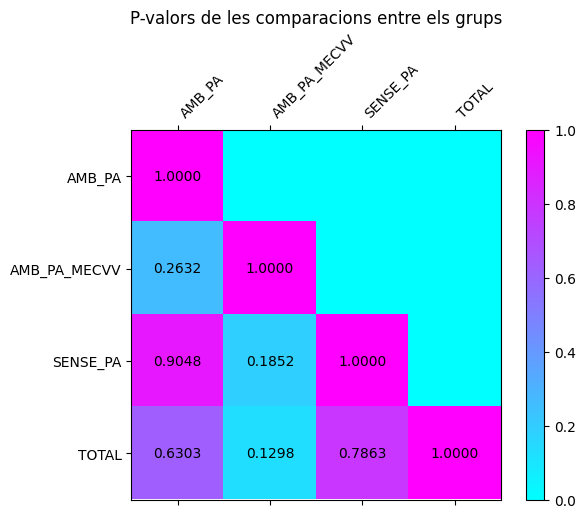

In [12]:
test_indepe_plot({'AMB_PA': AMB_PA['edat'], 'AMB_PA_MECVV': AMB_PA_MECVV['edat'], 'SENSE_PA': SENSE_PA['edat'], 'TOTAL': TOTAL['edat']})

## Sexe

#### Comparació distributiva. Test d'independència

Grup: AMB_PA
Chi-squared: 0.1704
P-value: 0.6798
---
Grup: Desconegut
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: SENSE_PA
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: AMB_PA_MECVV
Chi-squared: 0.1527
P-value: 0.6960
---


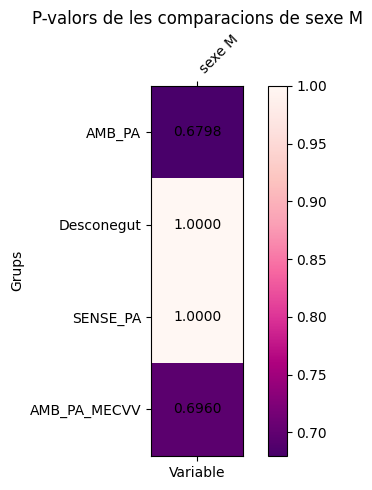

{'AMB_PA': 0.6797808818044915,
 'Desconegut': 1.0,
 'SENSE_PA': 1.0,
 'AMB_PA_MECVV': 0.6959642874823095}

In [13]:
test_indepe_bin_plot(data_1= TOTAL['Classificació pacient'], data_2= TOTAL['sexe M'])

## Admissions

#### Comparació distributiva. Test d'independència

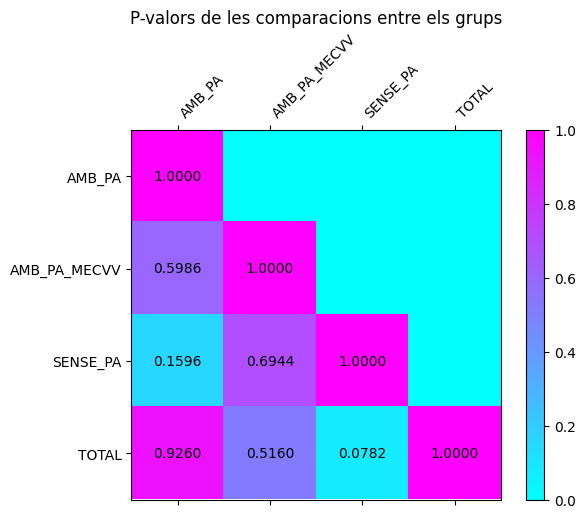

In [14]:
test_indepe_plot({'AMB_PA': AMB_PA['Admissions'], 'AMB_PA_MECVV': AMB_PA_MECVV['Admissions'], 'SENSE_PA': SENSE_PA['Admissions'], 'TOTAL': TOTAL['Admissions']})

## Admissions per urgències

#### Comparació distributiva. Test d'independència 

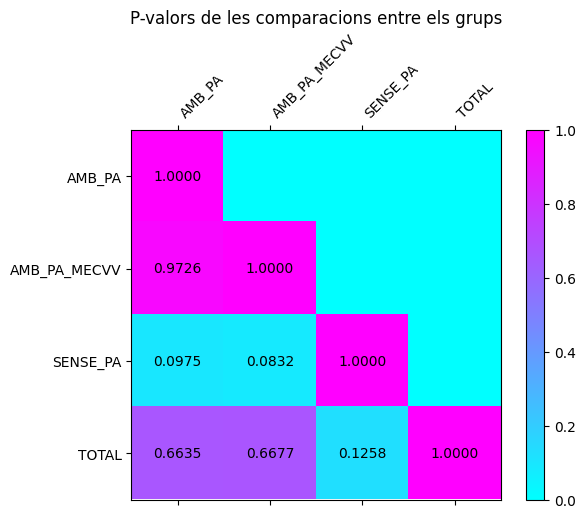

In [15]:
test_indepe_plot({'AMB_PA': AMB_PA['Emergències'], 'AMB_PA_MECVV': AMB_PA_MECVV['Emergències'], 'SENSE_PA': SENSE_PA['Emergències'], 'TOTAL': TOTAL['Emergències']})

## Disfàgia

#### Comparació distributiva. Test d'independència

Grup: AMB_PA
Chi-squared: 5.5371
P-value: 0.0186
---
Grup: Desconegut
Chi-squared: 3.5357
P-value: 0.0601
---
Grup: SENSE_PA
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: AMB_PA_MECVV
Chi-squared: 0.0000
P-value: 1.0000
---


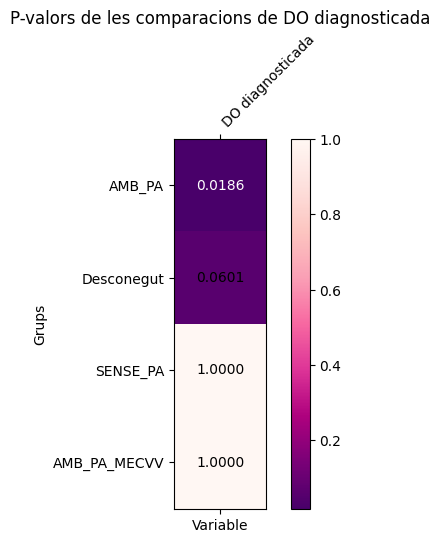

{'AMB_PA': 0.018617309818088998,
 'Desconegut': 0.06006023138632744,
 'SENSE_PA': 1.0,
 'AMB_PA_MECVV': 1.0}

In [16]:
test_indepe_bin_plot(data_1=TOTAL['Classificació pacient'], data_2=TOTAL['DO diagnosticada'])

## Index de Barthel

#### Comparació distributiva. Test d'independència

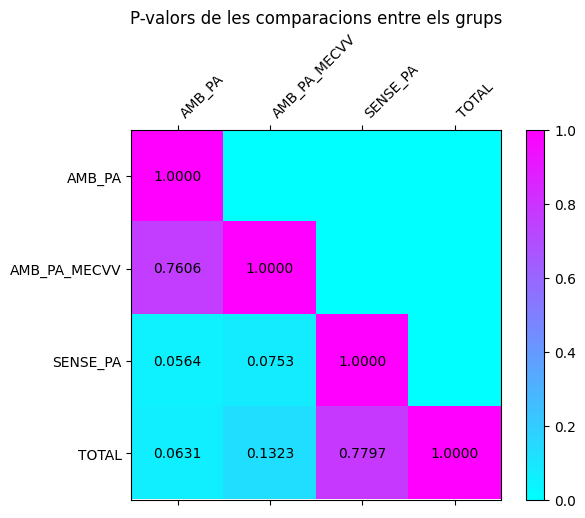

In [17]:
test_indepe_plot({'AMB_PA': AMB_PA['Barthel resultats'], 'AMB_PA_MECVV': AMB_PA_MECVV['Barthel resultats'], 'SENSE_PA': SENSE_PA['Barthel resultats'], 'TOTAL': TOTAL['Barthel resultats']})

## Categories índex de Barthel

#### Comparació distributiva. Test d'independència

Grup: AMB_PA
Chi-squared: 9.6469
P-value: 0.0218
---
Grup: Desconegut
Chi-squared: 12.1320
P-value: 0.0069
---
Grup: SENSE_PA
Chi-squared: 5.7135
P-value: 0.1264
---
Grup: AMB_PA_MECVV
Chi-squared: 3.0882
P-value: 0.3782
---


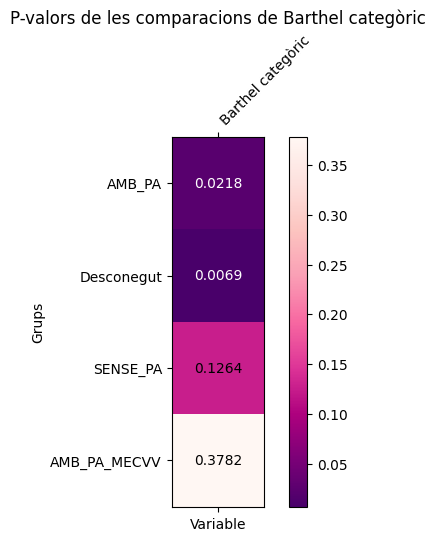

{'AMB_PA': 0.021818639534110642,
 'Desconegut': 0.006944261332936618,
 'SENSE_PA': 0.12641145667093806,
 'AMB_PA_MECVV': 0.3782200888680018}

In [18]:
test_indepe_bin_plot(data_1=TOTAL['Classificació pacient'], data_2=TOTAL['Barthel categòric'])

## Index del MNA

#### Comparació distributiva. Test d'independència

No hi ha prou dades per comparar AMB_PA_MECVV i AMB_PA
No hi ha prou dades per comparar AMB_PA_MECVV i AMB_PA_MECVV
No hi ha prou dades per comparar SENSE_PA i AMB_PA_MECVV
No hi ha prou dades per comparar TOTAL i AMB_PA_MECVV


C:\Users\maria\PycharmProjects\practicum\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


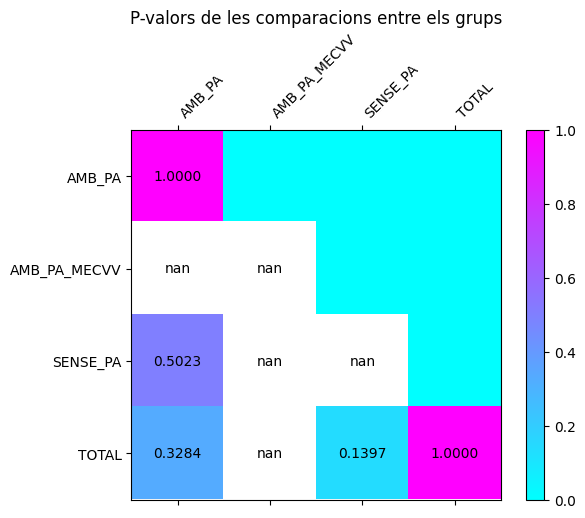

In [19]:
test_indepe_plot({'AMB_PA': AMB_PA['MNA resultats'], 'AMB_PA_MECVV': AMB_PA_MECVV['MNA resultats'], 'SENSE_PA': SENSE_PA['MNA resultats'], 'TOTAL': TOTAL['MNA resultats']})

## Categories test MNA

#### Comparació distributiva. Test d'independència 

Grup: AMB_PA
Chi-squared: 2.1033
P-value: 0.3494
---
Grup: Desconegut
Chi-squared: 4.2133
P-value: 0.1216
---
Grup: SENSE_PA
Chi-squared: 1.3304
P-value: 0.5142
---
Grup: AMB_PA_MECVV
Chi-squared: 0.7452
P-value: 0.6890
---


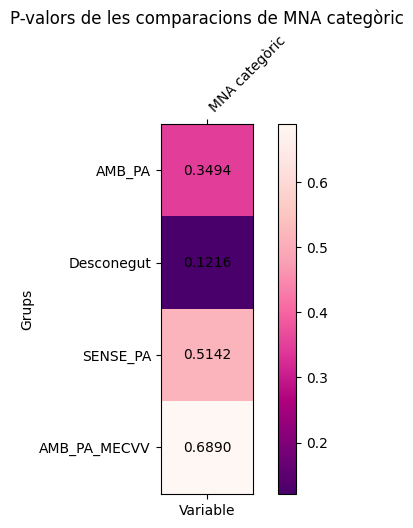

{'AMB_PA': 0.3493529183428242,
 'Desconegut': 0.12164584493622745,
 'SENSE_PA': 0.5141636902535187,
 'AMB_PA_MECVV': 0.6889540885038762}

In [20]:
test_indepe_bin_plot(data_1= TOTAL['Classificació pacient'], data_2= TOTAL['MNA categòric'])

## Index de l'EMINA

#### Comparació distributiva. Test d'independència

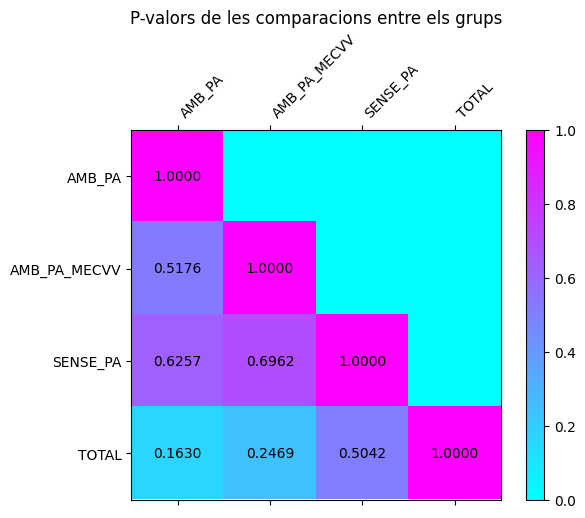

In [21]:
test_indepe_plot(({'AMB_PA': AMB_PA['EMINA resultats'], 'AMB_PA_MECVV': AMB_PA_MECVV['EMINA resultats'], 'SENSE_PA': SENSE_PA['EMINA resultats'], 'TOTAL': TOTAL['EMINA resultats']}))

## Categories de l'índex de l'EMINA

#### Comparació distributiva. Test d'independència

Grup: AMB_PA
Chi-squared: 7.5469
P-value: 0.0564
---
Grup: Desconegut
Chi-squared: 12.1676
P-value: 0.0068
---
Grup: SENSE_PA
Chi-squared: 0.9989
P-value: 0.8015
---
Grup: AMB_PA_MECVV
Chi-squared: 2.3100
P-value: 0.5106
---


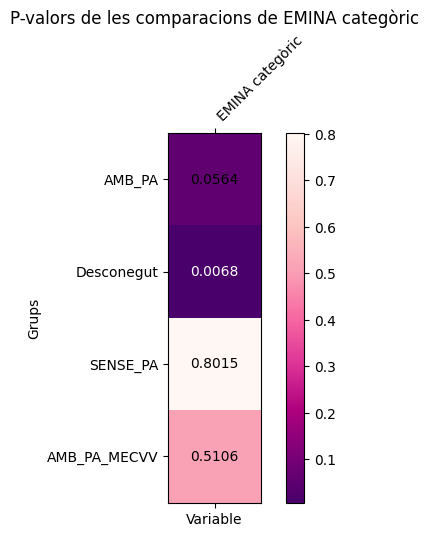

{'AMB_PA': 0.05636618659721152,
 'Desconegut': 0.006830390488715915,
 'SENSE_PA': 0.8015135468481627,
 'AMB_PA_MECVV': 0.5106078799092859}

In [22]:
test_indepe_bin_plot(data_1= TOTAL['Classificació pacient'], data_2= TOTAL['EMINA categòric'])

## Index de la canadenca (escala neurològica canadenca)

#### Comparació distributiva. Test d'independència

No hi ha prou dades per comparar AMB_PA i AMB_PA
No hi ha prou dades per comparar AMB_PA_MECVV i AMB_PA
No hi ha prou dades per comparar AMB_PA_MECVV i AMB_PA_MECVV
No hi ha prou dades per comparar SENSE_PA i AMB_PA
No hi ha prou dades per comparar SENSE_PA i AMB_PA_MECVV
No hi ha prou dades per comparar SENSE_PA i SENSE_PA
No hi ha prou dades per comparar TOTAL i AMB_PA
No hi ha prou dades per comparar TOTAL i AMB_PA_MECVV
No hi ha prou dades per comparar TOTAL i SENSE_PA
No hi ha prou dades per comparar TOTAL i TOTAL


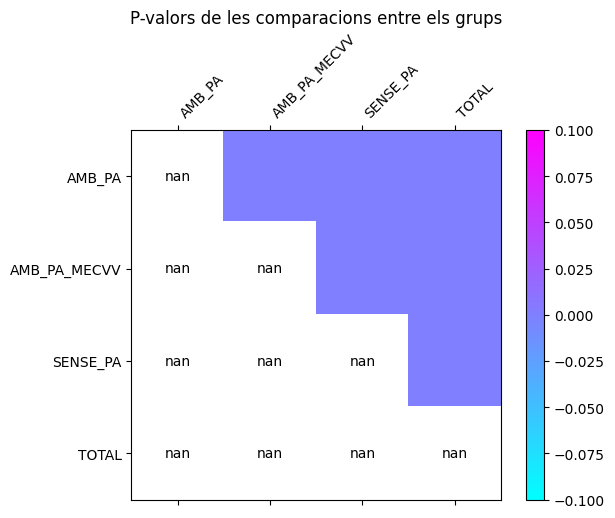

In [23]:
test_indepe_plot({'AMB_PA': AMB_PA['Canadenca resultats'], 'AMB_PA_MECVV': AMB_PA_MECVV['Canadenca resultats'], 'SENSE_PA': SENSE_PA['Canadenca resultats'], 'TOTAL': TOTAL['Canadenca resultats']})

## Categories de l'índex de la canadenca

#### Comparació distributiva. Test d'independència 

Grup: AMB_PA
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: Desconegut
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: SENSE_PA
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: AMB_PA_MECVV
Chi-squared: 0.0000
P-value: 1.0000
---


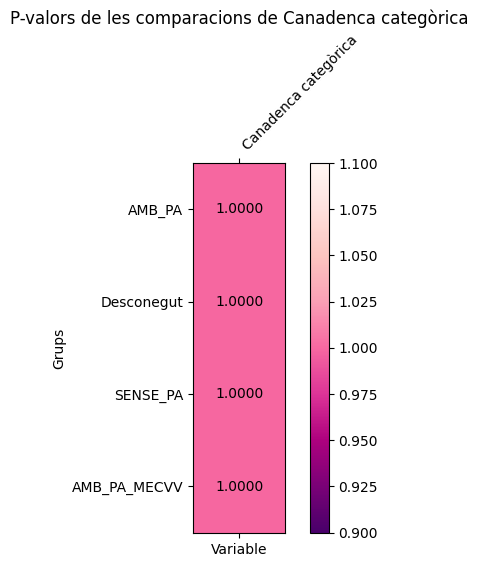

{'AMB_PA': 1.0, 'Desconegut': 1.0, 'SENSE_PA': 1.0, 'AMB_PA_MECVV': 1.0}

In [24]:
test_indepe_bin_plot(data_1= TOTAL['Classificació pacient'], data_2= TOTAL['Canadenca categòrica'])

## Infeccions respiratòries

#### Comparació distributiva. Test d'independència 

Grup: AMB_PA
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: Desconegut
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: SENSE_PA
Chi-squared: 0.0520
P-value: 0.8197
---
Grup: AMB_PA_MECVV
Chi-squared: 0.3472
P-value: 0.5557
---


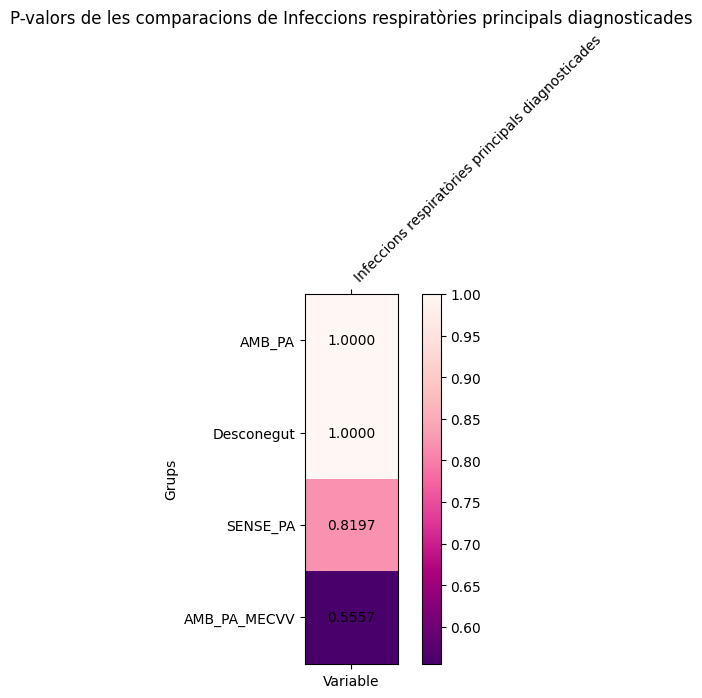

{'AMB_PA': 1.0,
 'Desconegut': 1.0,
 'SENSE_PA': 0.8197020585421684,
 'AMB_PA_MECVV': 0.5557042611556269}

In [25]:
test_indepe_bin_plot(data_1= TOTAL['Classificació pacient'], data_2= TOTAL['Infeccions respiratòries principals diagnosticades'])

Grup: AMB_PA
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: Desconegut
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: SENSE_PA
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: AMB_PA_MECVV
Chi-squared: 0.0000
P-value: 1.0000
---


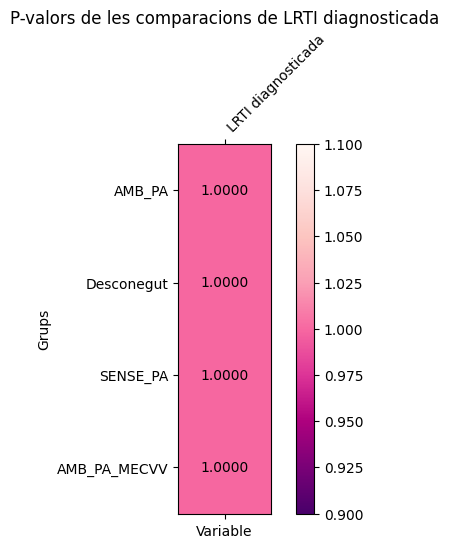

{'AMB_PA': 1.0, 'Desconegut': 1.0, 'SENSE_PA': 1.0, 'AMB_PA_MECVV': 1.0}

In [26]:
test_indepe_bin_plot(data_1= TOTAL['Classificació pacient'], data_2= TOTAL['LRTI diagnosticada'])

Grup: AMB_PA
Chi-squared: 0.3651
P-value: 0.5457
---
Grup: Desconegut
Chi-squared: 0.8784
P-value: 0.3486
---
Grup: SENSE_PA
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: AMB_PA_MECVV
Chi-squared: 0.1050
P-value: 0.7459
---


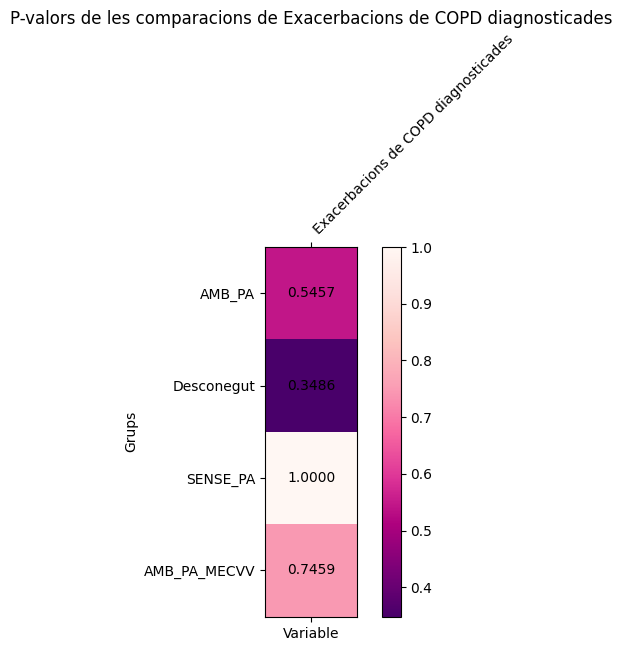

{'AMB_PA': 0.5456744759787757,
 'Desconegut': 0.3486316739936852,
 'SENSE_PA': 1.0,
 'AMB_PA_MECVV': 0.7459099958053774}

In [27]:
test_indepe_bin_plot(data_1= TOTAL['Classificació pacient'], data_2= TOTAL['Exacerbacions de COPD diagnosticades'])

Grup: AMB_PA
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: Desconegut
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: SENSE_PA
Chi-squared: 0.0000
P-value: 1.0000
---
Grup: AMB_PA_MECVV
Chi-squared: 0.0000
P-value: 1.0000
---


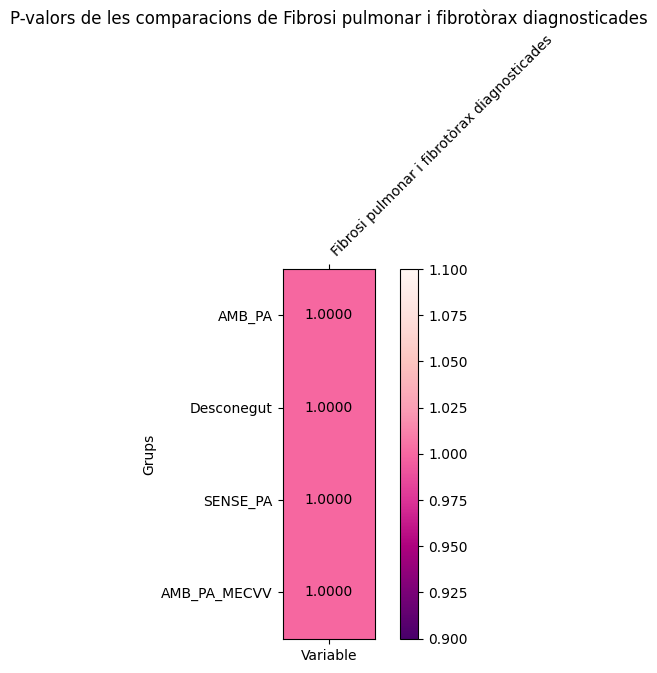

{'AMB_PA': 1.0, 'Desconegut': 1.0, 'SENSE_PA': 1.0, 'AMB_PA_MECVV': 1.0}

In [28]:
test_indepe_bin_plot(data_1= TOTAL['Classificació pacient'], data_2= TOTAL['Fibrosi pulmonar i fibrotòrax diagnosticades'])

# Resultats de laboratori

## Albúmina

#### Comparació distributiva. Test d'independència

No hi ha prou dades per comparar AMB_PA_MECVV i AMB_PA
No hi ha prou dades per comparar AMB_PA_MECVV i AMB_PA_MECVV
No hi ha prou dades per comparar SENSE_PA i AMB_PA_MECVV
No hi ha prou dades per comparar TOTAL i AMB_PA_MECVV


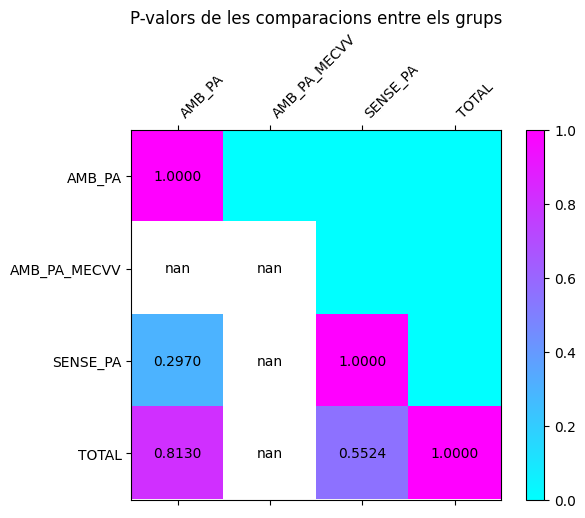

In [29]:
test_indepe_plot({'AMB_PA': AMB_PA['Albúmina'], 'AMB_PA_MECVV': AMB_PA_MECVV['Albúmina'], 'SENSE_PA': SENSE_PA['Albúmina'], 'TOTAL': TOTAL['Albúmina']})

### Proteïnes totals

#### Comparació distributiva. Test d'independència

No hi ha prou dades per comparar AMB_PA_MECVV i AMB_PA
No hi ha prou dades per comparar AMB_PA_MECVV i AMB_PA_MECVV
No hi ha prou dades per comparar SENSE_PA i AMB_PA_MECVV
No hi ha prou dades per comparar TOTAL i AMB_PA_MECVV


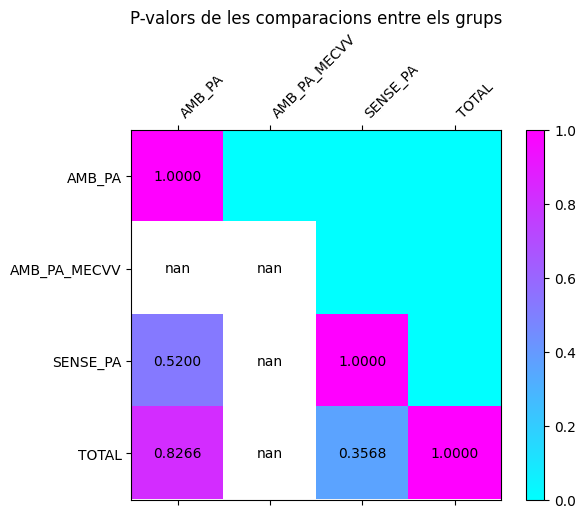

In [30]:
test_indepe_plot({'AMB_PA': AMB_PA['Proteïnes totals sèrum'], 'AMB_PA_MECVV': AMB_PA_MECVV['Proteïnes totals sèrum'], 'SENSE_PA': SENSE_PA['Proteïnes totals sèrum'], 'TOTAL': TOTAL['Proteïnes totals sèrum']})

### Hemoglobina

#### Comparació distributiva. Test d'independència

No hi ha prou dades per comparar AMB_PA_MECVV i AMB_PA
No hi ha prou dades per comparar AMB_PA_MECVV i AMB_PA_MECVV
No hi ha prou dades per comparar SENSE_PA i AMB_PA_MECVV
No hi ha prou dades per comparar TOTAL i AMB_PA_MECVV


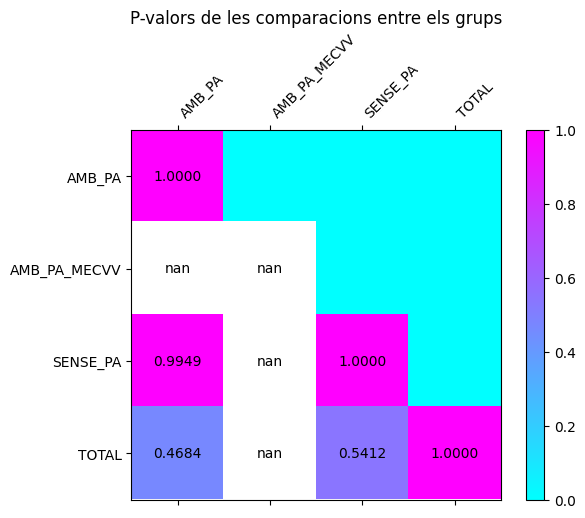

In [31]:
test_indepe_plot({'AMB_PA': AMB_PA['Hemoglobina'], 'AMB_PA_MECVV': AMB_PA_MECVV['Hemoglobina'], 'SENSE_PA': SENSE_PA['Hemoglobina'], 'TOTAL': TOTAL['Hemoglobina']})

### Colesterol 

#### Comparació distributiva. Test d'independència

No hi ha prou dades per comparar AMB_PA_MECVV i AMB_PA
No hi ha prou dades per comparar AMB_PA_MECVV i AMB_PA_MECVV
No hi ha prou dades per comparar SENSE_PA i AMB_PA_MECVV
No hi ha prou dades per comparar TOTAL i AMB_PA_MECVV


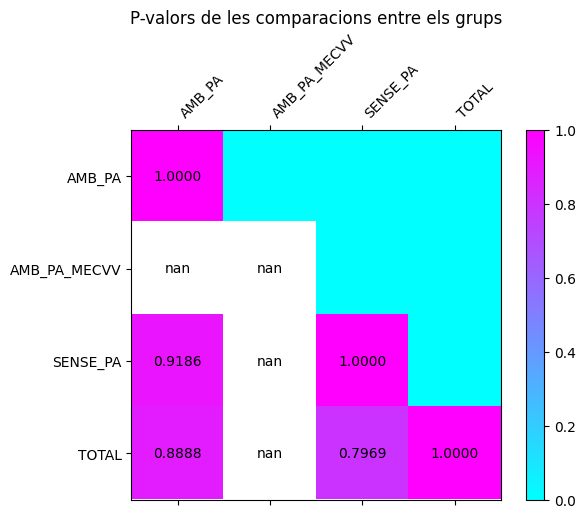

In [32]:
test_indepe_plot({'AMB_PA': AMB_PA['Colesterol total'], 'AMB_PA_MECVV': AMB_PA_MECVV['Colesterol total'], 'SENSE_PA': SENSE_PA['Colesterol total'], 'TOTAL': TOTAL['Colesterol total']})

### Leucòcits

#### Comparació distributiva. Test d'independència

No hi ha prou dades per comparar AMB_PA_MECVV i AMB_PA
No hi ha prou dades per comparar AMB_PA_MECVV i AMB_PA_MECVV
No hi ha prou dades per comparar SENSE_PA i AMB_PA_MECVV
No hi ha prou dades per comparar TOTAL i AMB_PA_MECVV


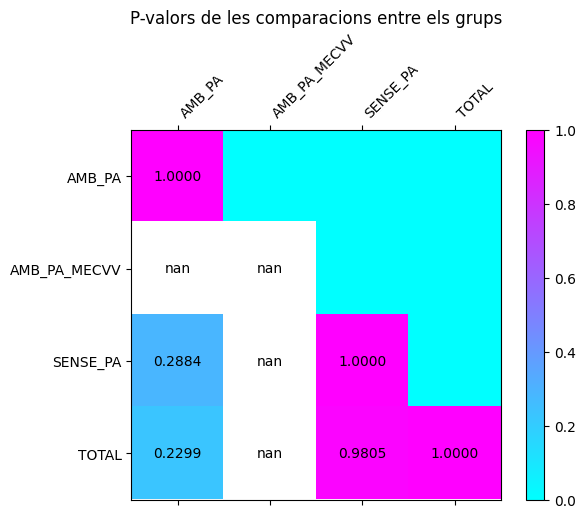

In [33]:
test_indepe_plot({'AMB_PA': AMB_PA['Leucòcits'], 'AMB_PA_MECVV': AMB_PA_MECVV['Leucòcits'], 'SENSE_PA': SENSE_PA['Leucòcits'], 'TOTAL': TOTAL['Leucòcits']})

### Limfòcits %

#### Comparació distributiva. Test d'independència

No hi ha prou dades per comparar AMB_PA i AMB_PA
No hi ha prou dades per comparar AMB_PA_MECVV i AMB_PA
No hi ha prou dades per comparar AMB_PA_MECVV i AMB_PA_MECVV
No hi ha prou dades per comparar SENSE_PA i AMB_PA
No hi ha prou dades per comparar SENSE_PA i AMB_PA_MECVV
No hi ha prou dades per comparar SENSE_PA i SENSE_PA
No hi ha prou dades per comparar TOTAL i AMB_PA
No hi ha prou dades per comparar TOTAL i AMB_PA_MECVV
No hi ha prou dades per comparar TOTAL i SENSE_PA


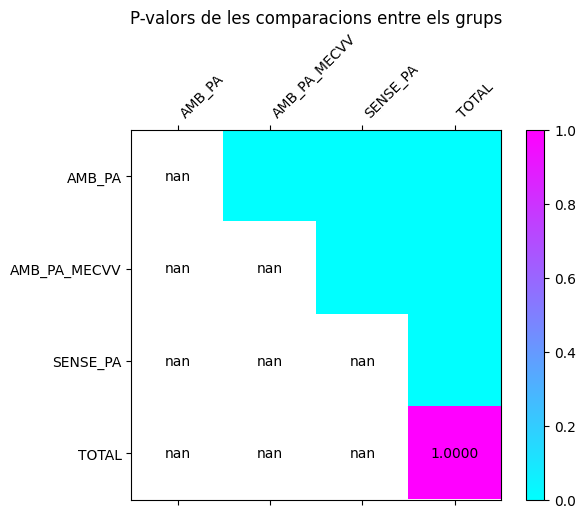

In [34]:
test_indepe_plot({'AMB_PA': AMB_PA['Limfòcits'], 'AMB_PA_MECVV': AMB_PA_MECVV['Limfòcits'], 'SENSE_PA': SENSE_PA['Limfòcits'], 'TOTAL': TOTAL['Limfòcits']})

### Proteïna C reactiva

#### Comparació distributiva. Test d'independència

No hi ha prou dades per comparar AMB_PA_MECVV i AMB_PA
No hi ha prou dades per comparar AMB_PA_MECVV i AMB_PA_MECVV
No hi ha prou dades per comparar SENSE_PA i AMB_PA_MECVV
No hi ha prou dades per comparar TOTAL i AMB_PA_MECVV


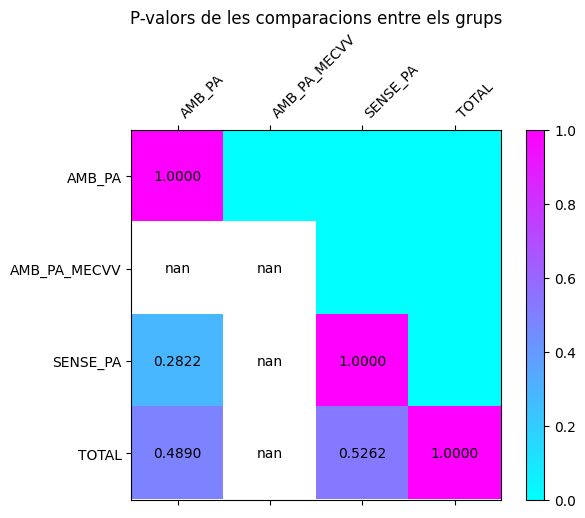

In [35]:
test_indepe_plot({'AMB_PA': AMB_PA['Proteïna C reactiva'], 'AMB_PA_MECVV': AMB_PA_MECVV['Proteïna C reactiva'], 'SENSE_PA': SENSE_PA['Proteïna C reactiva'], 'TOTAL': TOTAL['Proteïna C reactiva']})

### Urea 

#### Comparació distributiva. Test d'independència

No hi ha prou dades per comparar AMB_PA_MECVV i AMB_PA
No hi ha prou dades per comparar AMB_PA_MECVV i AMB_PA_MECVV
No hi ha prou dades per comparar SENSE_PA i AMB_PA_MECVV
No hi ha prou dades per comparar TOTAL i AMB_PA_MECVV


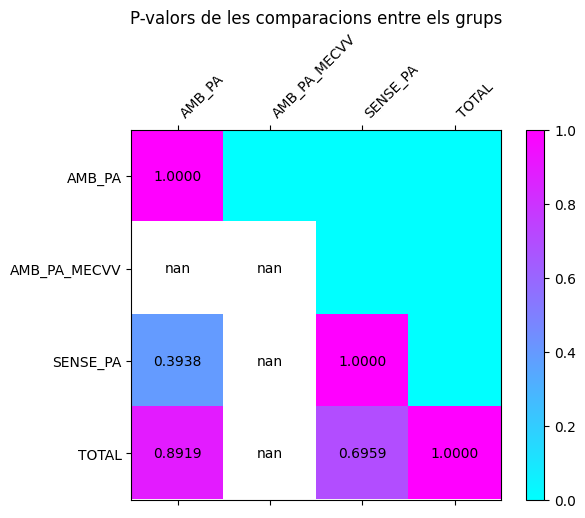

In [36]:
test_indepe_plot({'AMB_PA': AMB_PA['Urea'], 'AMB_PA_MECVV': AMB_PA_MECVV['Urea'], 'SENSE_PA': SENSE_PA['Urea'], 'TOTAL': TOTAL['Urea']})

### Filtració glomerular

#### Comparació distributiva. Test d'independència.

No hi ha prou dades per comparar AMB_PA_MECVV i AMB_PA
No hi ha prou dades per comparar AMB_PA_MECVV i AMB_PA_MECVV
No hi ha prou dades per comparar SENSE_PA i AMB_PA_MECVV
No hi ha prou dades per comparar TOTAL i AMB_PA_MECVV


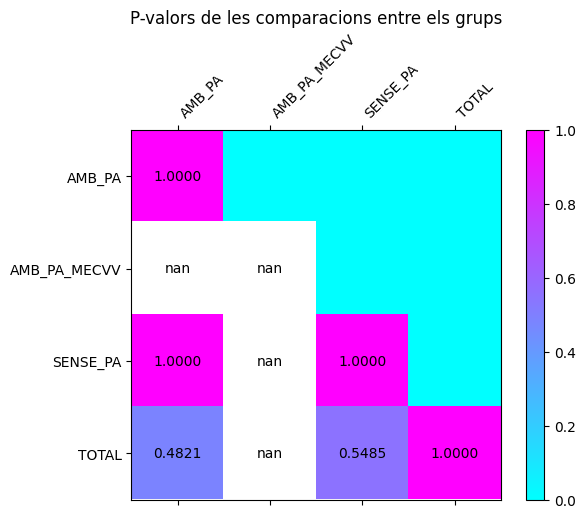

In [37]:
test_indepe_plot({'AMB_PA': AMB_PA['Filtrat glomerular'], 'AMB_PA_MECVV': AMB_PA_MECVV['Filtrat glomerular'], 'SENSE_PA': SENSE_PA['Filtrat glomerular'], 'TOTAL': TOTAL['Filtrat glomerular']})